In [319]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [320]:
df=pd.read_csv('/Users/jalis/Downloads/Churn_Modelling.csv')

In [321]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [322]:
df.dtypes 

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [323]:
df.drop(['CustomerId', 'RowNumber', 'Surname'], axis = 1,inplace=True) 


In [324]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

CreditScore: [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 5

In [325]:
df['Geography'].value_counts(normalize=True)

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

as we can see, 50% of ours customers live in France.
France is the most represented country

In [326]:
df['Gender'].value_counts(normalize=True)

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

as we can see, 54% of ours customers is a man


In [327]:
#check if we have missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [328]:
#check if we have duplicated values
df.duplicated(keep='first').sum()


0

In [329]:
#lets encoding qualitative values 
dummy_variable_1 = pd.get_dummies(df["Geography"])
dummy_variable_1.head()


,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [330]:

#lets encoding qualitative values 
dummy_variable_1 = pd.get_dummies(df["Geography"])
dummy_variable_1.head()

# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("Geography", axis = 1, inplace=True)


In [331]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

#1=Female
#0=Male

In [332]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [333]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [334]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [335]:
df['Age'].nunique()

70

In [336]:
bins = np.linspace(min(df["Tenure"]), max(df["Tenure"]), 5)
bins



array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [337]:
group_names = ['Moins de deux mois', 'Entre 2 et 5 mois ', 'Entre 5 et 7 mois ','Entre 7 et 10 mois']


In [338]:
df['category_tenure'] = pd.cut(df['Tenure'], bins, labels=group_names, include_lowest=True )
df[['Tenure','category_tenure']].head(20)


,Tenure,category_tenure
0,2,Moins de deux mois
1,1,Moins de deux mois
2,8,Entre 7 et 10 mois
3,1,Moins de deux mois
4,2,Moins de deux mois
5,8,Entre 7 et 10 mois
6,7,Entre 5 et 7 mois
7,4,Entre 2 et 5 mois
8,4,Entre 2 et 5 mois
9,2,Moins de deux mois


In [339]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,category_tenure
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0,Moins de deux mois
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1,Moins de deux mois
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0,Entre 7 et 10 mois
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0,Moins de deux mois
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1,Moins de deux mois
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0,Entre 2 et 5 mois
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0,Entre 7 et 10 mois
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0,Entre 5 et 7 mois
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0,Entre 2 et 5 mois


In [340]:
df['category_tenure'].value_counts(normalize=True)

Entre 2 et 5 mois     0.3010
Entre 7 et 10 mois    0.2499
Moins de deux mois    0.2496
Entre 5 et 7 mois     0.1995
Name: category_tenure, dtype: float64

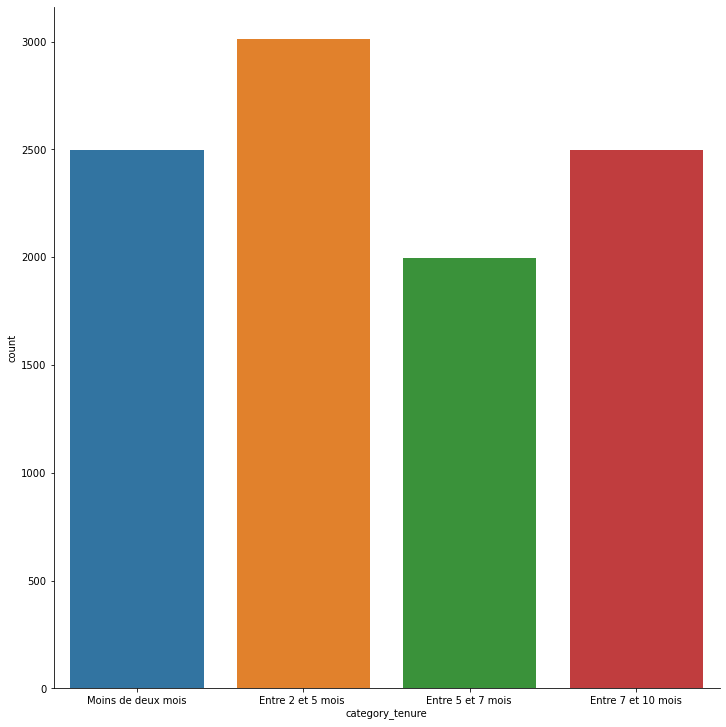

In [341]:
sns.catplot(x='category_tenure', kind='count',data=df, height=10)

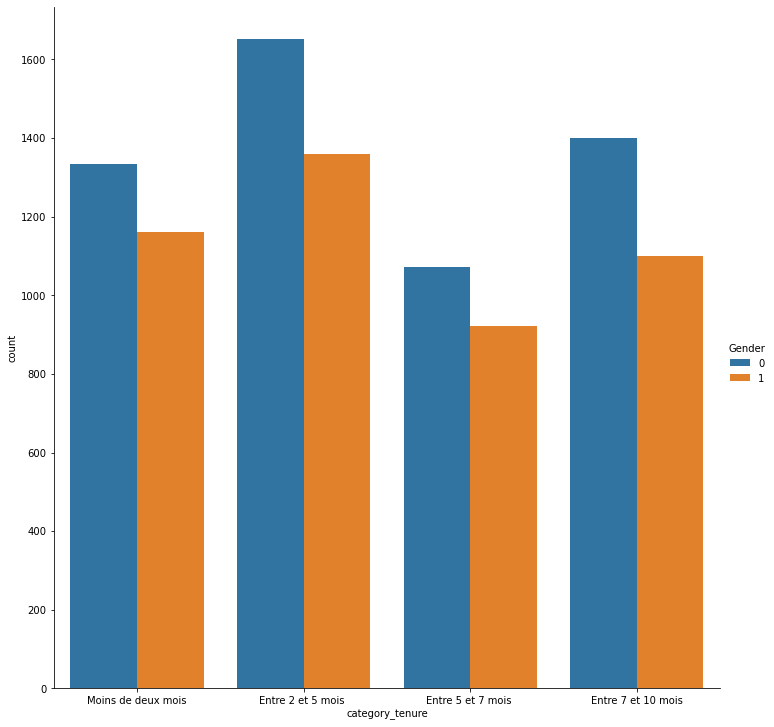

In [342]:
sns.catplot(x='category_tenure', kind='count', hue='Gender',data=df, height=10)

In [343]:
df['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [344]:
bins = np.linspace(min(df["Age"]), max(df["Age"]),6)
bins


array([18. , 32.8, 47.6, 62.4, 77.2, 92. ])

In [345]:
groupi_names = ['Entre 18 et 33 ans', 'Entre 33 et 50 ans', 'Entre 50 et 63 ans ','Entre 63 et 77 ans','Entre 77 ans et 92']


In [346]:
df['group_age'] = pd.cut(df['Age'], bins, labels=groupi_names, include_lowest=True )
df[['Age','group_age']].head(20)

,Age,group_age
0,42,Entre 33 et 50 ans
1,41,Entre 33 et 50 ans
2,42,Entre 33 et 50 ans
3,39,Entre 33 et 50 ans
4,43,Entre 33 et 50 ans
5,44,Entre 33 et 50 ans
6,50,Entre 50 et 63 ans
7,29,Entre 18 et 33 ans
8,44,Entre 33 et 50 ans
9,27,Entre 18 et 33 ans


In [347]:
df['group_age'].value_counts(normalize=True)*100

Entre 33 et 50 ans     55.00
Entre 18 et 33 ans     27.90
Entre 50 et 63 ans     13.51
Entre 63 et 77 ans      3.35
Entre 77 ans et 92      0.24
Name: group_age, dtype: float64

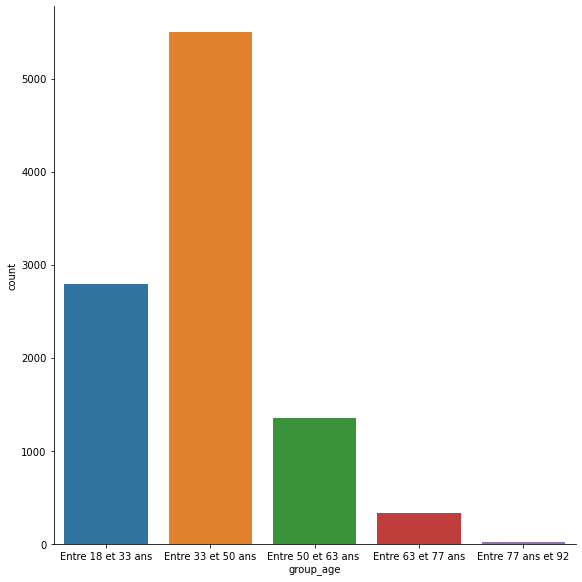

In [348]:
sns.catplot(x='group_age',kind='count',data=df,height=8)

55% of ours customers have between 33 and 50 years 

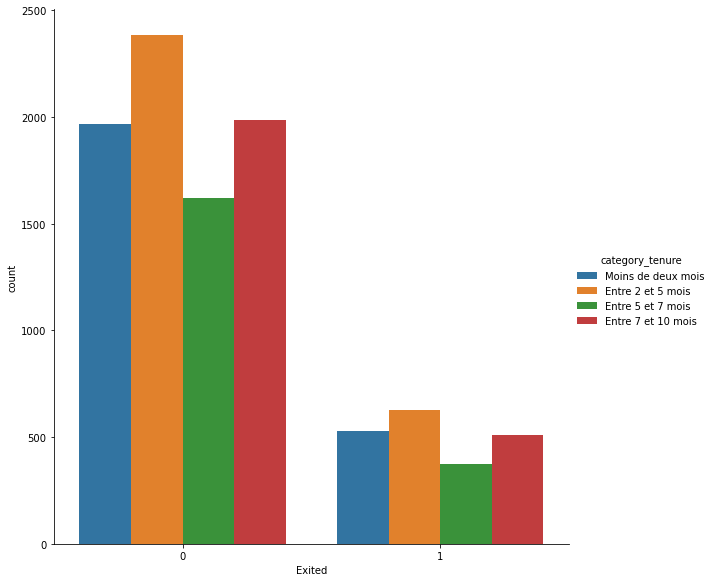

In [350]:
sns.catplot(x='Exited',kind='count', hue='category_tenure', data=df,height=8)

In [261]:
pd.pivot_table(df[['Exited','Age']], index='Exited',aggfunc='mean')


,Age
Exited,
0,37.408389
1,44.837997


on average, those who drop out are older than those who stay

In [262]:
df.dtypes

CreditScore           int64
Gender                int64
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
France                uint8
Germany               uint8
Spain                 uint8
category_tenure    category
group_age          category
dtype: object

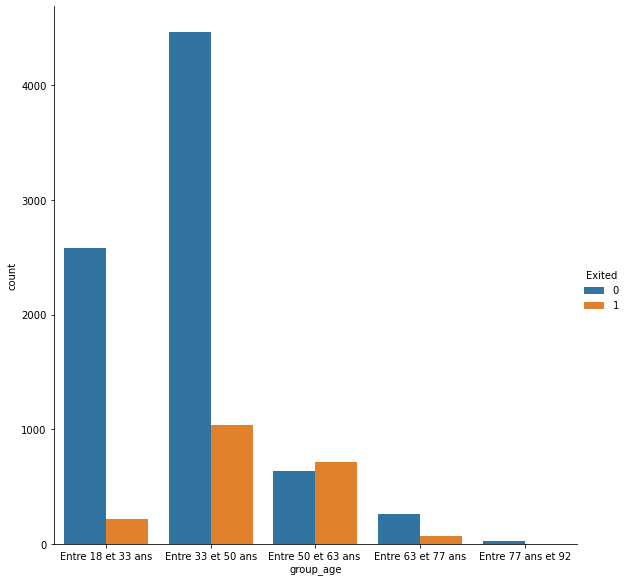

In [263]:
sns.catplot(x='group_age',kind='count',hue='Exited', data=df,height=8)

as we can see most of people who churn the most are in the 33 and 50 age group

In [264]:
pd.pivot_table(df[['Exited','EstimatedSalary']], index='Exited',aggfunc='mean')


,EstimatedSalary
Exited,
0,99738.391772
1,101465.677531


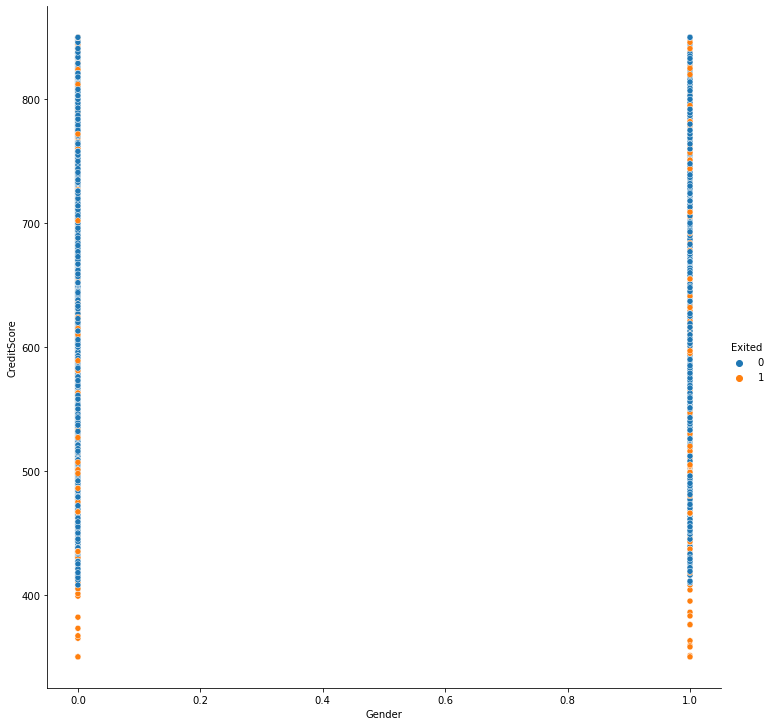

In [265]:
ax=sns.relplot(data=df, x='Gender',y='CreditScore',hue='Exited',height=10)


<AxesSubplot:xlabel='CreditScore', ylabel='EstimatedSalary'>

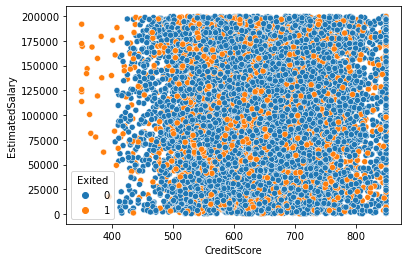

In [266]:
sns.scatterplot(data=df,x='CreditScore',y='EstimatedSalary',hue='Exited')

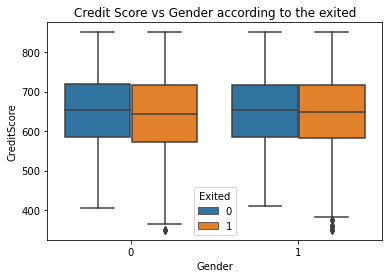

In [267]:
ax=sns.boxplot(x='Gender', y='CreditScore', hue='Exited', data=df).set(title='Credit Score vs Gender according to the exited')


- 1 pour women 
- 0 for men

hmm difficult to conclude but : 
- on average the credit score is higher for people who doesnt churn  


In [268]:
pd.pivot_table(df[['Gender','CreditScore']], index='Gender',aggfunc='mean')


,CreditScore
Gender,
0,650.276892
1,650.831389


pretty similar, nothing to say 

In [269]:
df.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.454300,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.501400,0.250900,0.247700
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.500023,0.433553,0.431698
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,0.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


no difference 

In [270]:
dbi = df[["CreditScore", "Exited",'EstimatedSalary','Gender','HasCrCard','Age','Exited','France','Spain','Germany']]
dbi.head(5)


,CreditScore,Exited,EstimatedSalary,Gender,HasCrCard,Age,Exited,France,Spain,Germany
0,619,1,101348.88,1,1,42,1,1,0,0
1,608,0,112542.58,1,0,41,0,0,1,0
2,502,1,113931.57,1,1,42,1,1,0,0
3,699,0,93826.63,1,0,39,0,1,0,0
4,850,0,79084.10,1,1,43,0,0,1,0


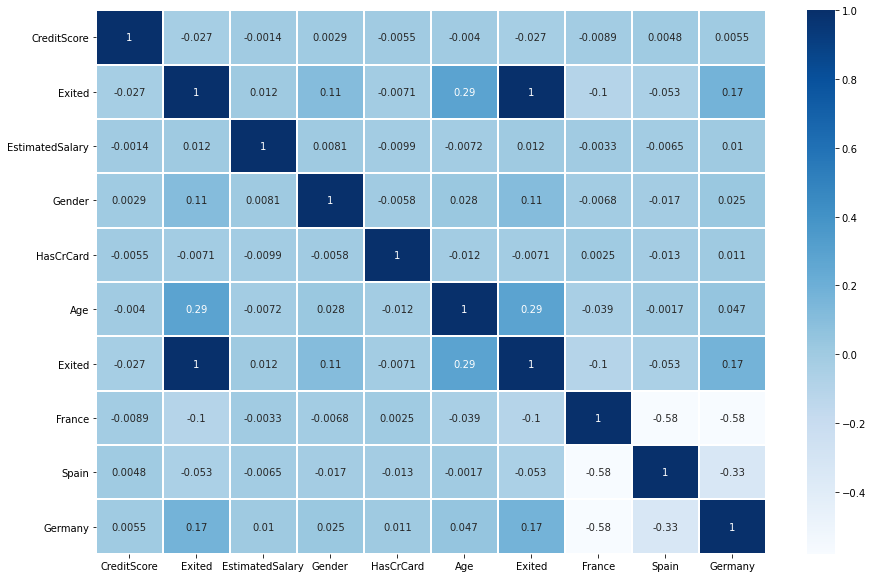

In [271]:
plt.figure(figsize=(15,10))
sns.heatmap(dbi.corr(),annot=True,linewidths=1,cmap='Blues')
plt.show()


(0.0, 95.7)

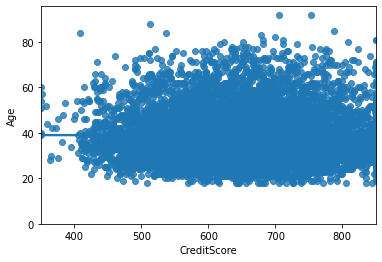

In [272]:
sns.regplot(x='CreditScore', y='Age', data=df)
plt.ylim(0,)


In [273]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,category_tenure,group_age
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0,Moins de deux mois,Entre 33 et 50 ans
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1,Moins de deux mois,Entre 33 et 50 ans
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0,Entre 7 et 10 mois,Entre 33 et 50 ans
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0,Moins de deux mois,Entre 33 et 50 ans
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1,Moins de deux mois,Entre 33 et 50 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0,Entre 2 et 5 mois,Entre 33 et 50 ans
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0,Entre 7 et 10 mois,Entre 33 et 50 ans
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0,Entre 5 et 7 mois,Entre 33 et 50 ans
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0,Entre 2 et 5 mois,Entre 33 et 50 ans


# Data Processing


In [274]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'France',
       'Germany', 'Spain', 'category_tenure', 'group_age'],
      dtype='object')

In [275]:
df.dtypes

CreditScore           int64
Gender                int64
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited                int64
France                uint8
Germany               uint8
Spain                 uint8
category_tenure    category
group_age          category
dtype: object

In [276]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,category_tenure,group_age
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0,Moins de deux mois,Entre 33 et 50 ans
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1,Moins de deux mois,Entre 33 et 50 ans
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0,Entre 7 et 10 mois,Entre 33 et 50 ans
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0,Moins de deux mois,Entre 33 et 50 ans
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1,Moins de deux mois,Entre 33 et 50 ans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0,Entre 2 et 5 mois,Entre 33 et 50 ans
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0,Entre 7 et 10 mois,Entre 33 et 50 ans
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0,Entre 5 et 7 mois,Entre 33 et 50 ans
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0,Entre 2 et 5 mois,Entre 33 et 50 ans


In [277]:
#drop these two for the regression model 
df.drop(['group_age', 'category_tenure'], axis = 1,inplace=True) 


In [278]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [279]:
for idx,column in enumerate(df.columns):
    print(idx,column)

0 CreditScore
1 Gender
2 Age
3 Tenure
4 Balance
5 NumOfProducts
6 HasCrCard
7 IsActiveMember
8 EstimatedSalary
9 Exited
10 France
11 Germany
12 Spain


In [281]:
df.loc[:,'Age']

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

In [282]:
df.iloc[:,2]

0       42
1       41
2       42
3       39
4       43
        ..
9995    39
9996    35
9997    36
9998    42
9999    28
Name: Age, Length: 10000, dtype: int64

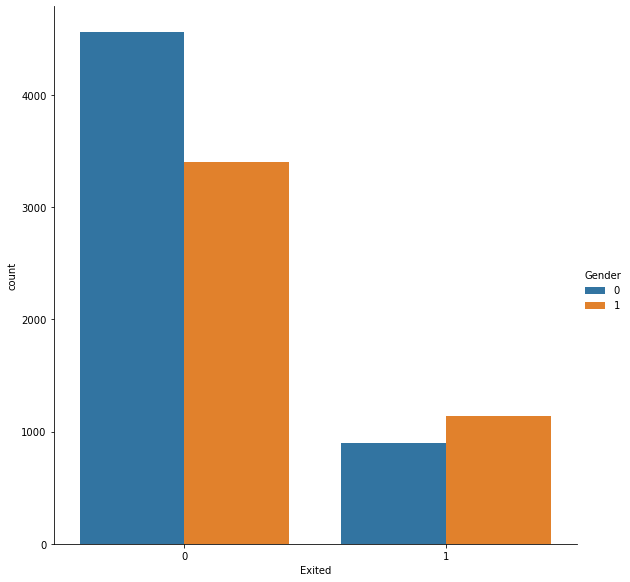

In [283]:
sns.catplot(x='Exited',kind='count',hue='Gender', data=df,height=8)

women have a higher churn rate than men 



## Logistic Regression

x = quantitative 
y = qualitative 

In [284]:
for idx,column in enumerate(df.columns):
    print(idx,column)

0 CreditScore
1 Gender
2 Age
3 Tenure
4 Balance
5 NumOfProducts
6 HasCrCard
7 IsActiveMember
8 EstimatedSalary
9 Exited
10 France
11 Germany
12 Spain


In [351]:
#finding features
df.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12]]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,0,1,0


In [352]:
#the y 
df.iloc[:, 9]

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [287]:
X = df.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12]].values
y = df.iloc[:, 9].values

In [288]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [289]:
# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [290]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.55025082,  1.08726059, -0.36637708, ..., -1.01558815,
         1.76021608, -0.57468161],
       [-1.31185979,  1.08726059,  0.11067641, ...,  0.98465111,
        -0.56811207, -0.57468161],
       [ 0.57157862,  1.08726059,  0.3014978 , ..., -1.01558815,
        -0.56811207,  1.74009395],
       ...,
       [ 1.95070838,  1.08726059,  0.01526571, ...,  0.98465111,
        -0.56811207, -0.57468161],
       [ 0.29369426, -0.91974271, -0.08014499, ..., -1.01558815,
         1.76021608, -0.57468161],
       [ 0.870047  , -0.91974271, -0.74801987, ...,  0.98465111,
        -0.56811207, -0.57468161]])

In [291]:
# Construction du modèle
classifier = LogisticRegression(random_state = 0, solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [292]:
# Faire de nouvelles prédictions
y_pred = classifier.predict(X_test)
classifier.score(X_test,y_test)

#compare les prédictions sur le jeu x_test a y_test (les vraies valeurs constatés )

0.8068

### so we have almost 81% accuracy


In [293]:
# Matrice de confusion

cm = confusion_matrix(y_test, y_pred)
print(cm)

#print(classification_report(y_test, y_pred))
#comparaison between y_test and ours predicted valeurs 

[[1901   90]
 [ 393  116]]


confusion matrix evaluate the accuracy of a classification.

on the diagonal, you have the right numbers that have been well classified. 

- 1961 true 0 have been well classified and 482 '1' have been classified as 0
- 27 true 1 have been well classified and 27 '0' have been classified as 0 



## Predictions 

In [318]:
#sc.transform in order to maintain the scale. 

x_predict = scale.transform([[8000,1,20,2,400.86,0,0,0,16000,1,0,1]])
classifier.predict(x_predict)


array([0])

according to these criteria, this individual wont churn 